In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error,roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
pd.options.display.max_columns = None


In [2]:
df_Data_Train = pd.read_csv("Data_Train.csv")
df_Data_Train.head()

,ID,Asst_Reg,GGGrade,Experience,Validation,Yearly Income,Home Status,Unpaid 2 years,Already Defaulted,Designation,Debt to Income,Postal Code,Lend Amount,Deprecatory Records,Interest Charged,Usage Rate,Inquiries,Present Balance,Gross Collection,Sub GGGrade,File Status,State,Account Open,Total Unpaid CL,Duration,Unpaid Amount,Reason,Claim Type,Due Fee,Loan/No Loan
0,95074,421802,II,>10yrs,Vfied,633600.00,MOR??AGE,0,0,GLENDALE NISSAN,12.5496,91300.0,42023.25,0,15.39,88.924,3,607161.90,0.0,19,fully paid,California,17,58598.0,3 years,31216.05,debt consolidation,I,0.0,0
1,134131,3964312,IV,7yrs,Source Verified,85483.20,REN?,0,0,Business Teacher,9.0048,27400.0,38133.00,0,9.94,102.856,0,269234.06,0.0,30,whole,NC,15,18924.0,5 years,11660.49,debt consolidation,I,0.0,0
2,92602,4247560,III,<1yr,Source Verified,79200.00,REN?,0,0,driver,24.9144,32800.0,17100.00,0,22.35,60.372,0,22476.53,0.0,25,whole,Florida,7,15604.0,5 years,5637.87,major purchase,I,0.0,0
3,22591,197179,III,<1yr,Vfied,61600.00,REN?,0,0,AvePoint,16.5816,7000.0,5130.00,0,10.36,116.272,1,15242.09,0.0,22,fully paid,NewJersey,9,22410.0,3 years,15607.17,major purchase,I,0.0,1
4,125060,4646684,V,2yrs,Source Verified,68053.92,REN?,0,0,Lead Tester,40.0512,70800.0,19665.00,0,13.68,127.280,1,65433.94,0.0,32,fully paid,LA,10,36022.0,5 years,27472.86,debt consolidation,I,0.0,0


In [3]:
df_Data_Train.tail()

,ID,Asst_Reg,GGGrade,Experience,Validation,Yearly Income,Home Status,Unpaid 2 years,Already Defaulted,Designation,Debt to Income,Postal Code,Lend Amount,Deprecatory Records,Interest Charged,Usage Rate,Inquiries,Present Balance,Gross Collection,Sub GGGrade,File Status,State,Account Open,Total Unpaid CL,Duration,Unpaid Amount,Reason,Claim Type,Due Fee,Loan/No Loan
87495,120884,4535984,II,>10yrs,Not Vfied,75680.00,REN?,0,0,Engineer Support II,19.3200,48000.0,10260.0,0,8.35,51.084,1,15100.14,0.0,17,whole,MI,12,32702.0,3 years,10012.05,debt consolidation,I,0.0,0
87496,33259,2624710,IV,3yrs,Source Verified,90423.52,REN?,0,0,Dental Hygienist,48.8208,1400.0,27360.0,0,24.18,129.172,0,102811.88,0.0,28,whole,MA,23,32204.0,5 years,24921.54,debt consolidation,I,0.0,0
87497,102153,5966919,II,>10yrs,Source Verified,91520.00,MOR??AGE,0,0,Interface Coordinator,7.7952,6400.0,8550.0,3,11.03,83.420,1,14584.11,0.0,16,fully paid,CT,8,29050.0,3 years,14517.90,debt consolidation,I,0.0,0
87498,115343,2630667,III,1yrs,Source Verified,61600.00,MOR??AGE,0,0,PARTS CLERK,8.2992,16800.0,23769.0,1,22.52,56.760,1,59281.66,0.0,25,whole,PA,11,24900.0,3 years,8454.24,debt consolidation,I,0.0,0
87499,104968,6637289,III,2yrs,Vfied,NaN,REN?,0,0,Outside sales rep,15.1872,92800.0,28471.5,1,15.53,67.080,0,10445.85,0.0,25,whole,California,7,21746.0,5 years,8717.58,debt consolidation,I,0.0,0


In [4]:
df_Data_Train.shape

(87500, 30)

In [5]:
df_Data_Train.describe()

,ID,Asst_Reg,Yearly Income,Unpaid 2 years,Already Defaulted,Debt to Income,Postal Code,Lend Amount,Deprecatory Records,Interest Charged,Usage Rate,Inquiries,Present Balance,Gross Collection,Sub GGGrade,Account Open,Total Unpaid CL,Unpaid Amount,Due Fee,Loan/No Loan
count,87500.000000,8.750000e+04,8.192500e+04,87500.000000,87500.000000,84011.000000,86111.000000,87500.000000,87500.000000,87500.000000,87500.000000,87500.000000,8.750000e+04,87500.000000,87500.000000,87500.00000,8.331400e+04,8.264800e+04,87500.000000,87500.000000
mean,83946.253509,3.798914e+06,1.348596e+05,0.332937,0.005726,30.942660,51155.385491,25920.535680,0.202400,16.518375,95.517348,0.670640,2.363895e+05,39.461697,22.024891,12.77944,5.326864e+04,2.955649e+04,0.316407,0.188709
std,36100.102950,2.289038e+06,9.882473e+04,0.876080,0.083505,14.079813,31211.229930,14433.837213,0.646414,4.902011,40.554035,0.959572,2.550568e+05,391.919578,6.452697,5.37116,5.325551e+04,3.745625e+04,3.546087,0.391279
min,21560.000000,2.484700e+04,8.800000e+03,0.000000,0.000000,0.000000,1000.000000,1710.000000,0.000000,8.000000,0.000000,0.000000,0.000000e+00,0.000000,11.000000,2.00000,3.320000e+02,0.000000e+00,0.000000,0.000000
25%,52616.750000,1.483874e+06,8.324659e+04,0.000000,0.000000,20.428800,22900.000000,15048.000000,0.000000,12.310000,66.048000,0.000000,5.173493e+04,0.000000,17.000000,9.00000,2.324000e+04,1.144674e+04,0.000000,0.000000
50%,83900.000000,4.132010e+06,1.144000e+05,0.000000,0.000000,30.139200,47700.000000,23940.000000,0.000000,16.490000,97.008000,0.000000,1.388062e+05,0.000000,21.000000,12.00000,3.967400e+04,2.089278e+04,0.000000,0.000000
75%,115261.250000,5.952909e+06,1.601600e+05,0.000000,0.000000,40.908000,80200.000000,34200.000000,0.000000,20.770000,126.592000,1.000000,3.534755e+05,0.000000,26.000000,16.00000,6.640000e+04,3.644908e+04,0.000000,0.000000
max,146559.000000,7.351847e+06,8.264031e+06,18.000000,6.000000,639.290400,99900.000000,59850.000000,86.000000,25.000000,1534.756000,8.000000,5.629234e+06,26308.470000,45.000000,83.00000,1.710630e+06,1.338778e+06,169.050000,1.000000


In [6]:
df_Data_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87500 entries, 0 to 87499
Data columns (total 30 columns):
ID                     87500 non-null int64
Asst_Reg               87500 non-null int64
GGGrade                87500 non-null object
Experience             87500 non-null object
Validation             87500 non-null object
Yearly Income          81925 non-null float64
Home Status            87500 non-null object
Unpaid 2 years         87500 non-null int64
Already Defaulted      87500 non-null int64
Designation            86086 non-null object
Debt to Income         84011 non-null float64
Postal Code            86111 non-null float64
Lend Amount            87500 non-null float64
Deprecatory Records    87500 non-null int64
Interest Charged       87500 non-null float64
Usage Rate             87500 non-null float64
Inquiries              87500 non-null int64
Present Balance        87500 non-null float64
Gross Collection       87500 non-null float64
Sub GGGrade            87500 non-n

In [7]:
df_Data_Train.isnull().sum()

ID                        0
Asst_Reg                  0
GGGrade                   0
Experience                0
Validation                0
Yearly Income          5575
Home Status               0
Unpaid 2 years            0
Already Defaulted         0
Designation            1414
Debt to Income         3489
Postal Code            1389
Lend Amount               0
Deprecatory Records       0
Interest Charged          0
Usage Rate                0
Inquiries                 0
Present Balance           0
Gross Collection          0
Sub GGGrade               0
File Status               0
State                     0
Account Open              0
Total Unpaid CL        4186
Duration                  0
Unpaid Amount          4852
Reason                    0
Claim Type                0
Due Fee                   0
Loan/No Loan              0
dtype: int64

In [8]:
for column in df_Data_Train.columns:
    if df_Data_Train[column].dtype == 'object':
        print(column.upper(),': ',df_Data_Train[column].nunique())
        print(df_Data_Train[column].value_counts().sort_values())
        print('\n')

GGGRADE :  7
VII      498
VI      2192
V       7154
IV     13867
I      14171
III    24652
II     24966
Name: GGGrade, dtype: int64


EXPERIENCE :  11
9yrs       3607
6yrs       4255
8yrs       4604
7yrs       4762
4yrs       5324
5yrs       5623
1yrs       5853
<1yr       7209
3yrs       7350
2yrs       8064
>10yrs    30849
Name: Experience, dtype: int64


VALIDATION :  3
Not Vfied          26354
Vfied              26642
Source Verified    34504
Name: Validation, dtype: int64


HOME STATUS :  5
NONE            4
OTHER           6
OWN          8416
REN?        34914
MOR??AGE    44160
Name: Home Status, dtype: int64


DESIGNATION :  40354
Braun Corp                                     1
Senior Conversion Analyst                      1
Dayton Systems Group                           1
Americorps Fellow                              1
Machine operation / Slitting department        1
LAUSD-HOLLYWOOD HIGH SCHOOL                    1
Accouting Representative                       1
Tauers Supe

In [9]:
df_Data_Train["Home Status"].replace(['REN?'],["RENT"],inplace=True )
df_Data_Train["Home Status"].replace(['MOR??AGE'],["MORTGAGE"],inplace=True )

In [10]:
for column in df_Data_Train.columns:
    if df_Data_Train[column].dtype == 'object':
        print(column.upper(),': ',df_Data_Train[column].nunique())
        print(df_Data_Train[column].value_counts().sort_values())
        print('\n')

GGGRADE :  7
VII      498
VI      2192
V       7154
IV     13867
I      14171
III    24652
II     24966
Name: GGGrade, dtype: int64


EXPERIENCE :  11
9yrs       3607
6yrs       4255
8yrs       4604
7yrs       4762
4yrs       5324
5yrs       5623
1yrs       5853
<1yr       7209
3yrs       7350
2yrs       8064
>10yrs    30849
Name: Experience, dtype: int64


VALIDATION :  3
Not Vfied          26354
Vfied              26642
Source Verified    34504
Name: Validation, dtype: int64


HOME STATUS :  5
NONE            4
OTHER           6
OWN          8416
RENT        34914
MORTGAGE    44160
Name: Home Status, dtype: int64


DESIGNATION :  40354
Braun Corp                                     1
Senior Conversion Analyst                      1
Dayton Systems Group                           1
Americorps Fellow                              1
Machine operation / Slitting department        1
LAUSD-HOLLYWOOD HIGH SCHOOL                    1
Accouting Representative                       1
Tauers Supe

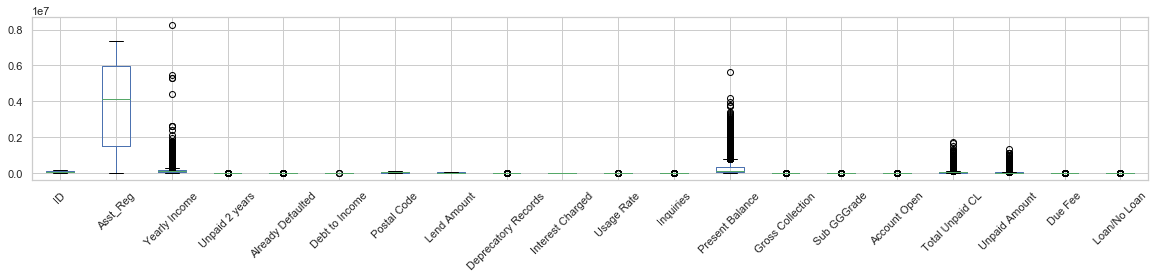

In [11]:
df_Data_Train.boxplot(figsize=(20,3))
plt.xticks(rotation=45)
plt.show()

In [12]:
for column in df_Data_Train.columns:
    if df_Data_Train[column].dtype != 'object':
        mean = df_Data_Train[column].mean()
        df_Data_Train[column] = df_Data_Train[column].fillna(mean)    
        
df_Data_Train.isnull().sum() 

ID                        0
Asst_Reg                  0
GGGrade                   0
Experience                0
Validation                0
Yearly Income             0
Home Status               0
Unpaid 2 years            0
Already Defaulted         0
Designation            1414
Debt to Income            0
Postal Code               0
Lend Amount               0
Deprecatory Records       0
Interest Charged          0
Usage Rate                0
Inquiries                 0
Present Balance           0
Gross Collection          0
Sub GGGrade               0
File Status               0
State                     0
Account Open              0
Total Unpaid CL           0
Duration                  0
Unpaid Amount             0
Reason                    0
Claim Type                0
Due Fee                   0
Loan/No Loan              0
dtype: int64

In [13]:
mode = df_Data_Train['Designation'].mode()[0]
df_Data_Train['Designation'] = df_Data_Train['Designation'].fillna(mode)
df_Data_Train.isnull().sum() 

ID                     0
Asst_Reg               0
GGGrade                0
Experience             0
Validation             0
Yearly Income          0
Home Status            0
Unpaid 2 years         0
Already Defaulted      0
Designation            0
Debt to Income         0
Postal Code            0
Lend Amount            0
Deprecatory Records    0
Interest Charged       0
Usage Rate             0
Inquiries              0
Present Balance        0
Gross Collection       0
Sub GGGrade            0
File Status            0
State                  0
Account Open           0
Total Unpaid CL        0
Duration               0
Unpaid Amount          0
Reason                 0
Claim Type             0
Due Fee                0
Loan/No Loan           0
dtype: int64

In [14]:
df_Data_Train['Postal Code'] = df_Data_Train['Postal Code'].astype("int64")
df_Data_Train.head()

,ID,Asst_Reg,GGGrade,Experience,Validation,Yearly Income,Home Status,Unpaid 2 years,Already Defaulted,Designation,Debt to Income,Postal Code,Lend Amount,Deprecatory Records,Interest Charged,Usage Rate,Inquiries,Present Balance,Gross Collection,Sub GGGrade,File Status,State,Account Open,Total Unpaid CL,Duration,Unpaid Amount,Reason,Claim Type,Due Fee,Loan/No Loan
0,95074,421802,II,>10yrs,Vfied,633600.00,MORTGAGE,0,0,GLENDALE NISSAN,12.5496,91300,42023.25,0,15.39,88.924,3,607161.90,0.0,19,fully paid,California,17,58598.0,3 years,31216.05,debt consolidation,I,0.0,0
1,134131,3964312,IV,7yrs,Source Verified,85483.20,RENT,0,0,Business Teacher,9.0048,27400,38133.00,0,9.94,102.856,0,269234.06,0.0,30,whole,NC,15,18924.0,5 years,11660.49,debt consolidation,I,0.0,0
2,92602,4247560,III,<1yr,Source Verified,79200.00,RENT,0,0,driver,24.9144,32800,17100.00,0,22.35,60.372,0,22476.53,0.0,25,whole,Florida,7,15604.0,5 years,5637.87,major purchase,I,0.0,0
3,22591,197179,III,<1yr,Vfied,61600.00,RENT,0,0,AvePoint,16.5816,7000,5130.00,0,10.36,116.272,1,15242.09,0.0,22,fully paid,NewJersey,9,22410.0,3 years,15607.17,major purchase,I,0.0,1
4,125060,4646684,V,2yrs,Source Verified,68053.92,RENT,0,0,Lead Tester,40.0512,70800,19665.00,0,13.68,127.280,1,65433.94,0.0,32,fully paid,LA,10,36022.0,5 years,27472.86,debt consolidation,I,0.0,0


In [15]:
df_Data_Train.head()

,ID,Asst_Reg,GGGrade,Experience,Validation,Yearly Income,Home Status,Unpaid 2 years,Already Defaulted,Designation,Debt to Income,Postal Code,Lend Amount,Deprecatory Records,Interest Charged,Usage Rate,Inquiries,Present Balance,Gross Collection,Sub GGGrade,File Status,State,Account Open,Total Unpaid CL,Duration,Unpaid Amount,Reason,Claim Type,Due Fee,Loan/No Loan
0,95074,421802,II,>10yrs,Vfied,633600.00,MORTGAGE,0,0,GLENDALE NISSAN,12.5496,91300,42023.25,0,15.39,88.924,3,607161.90,0.0,19,fully paid,California,17,58598.0,3 years,31216.05,debt consolidation,I,0.0,0
1,134131,3964312,IV,7yrs,Source Verified,85483.20,RENT,0,0,Business Teacher,9.0048,27400,38133.00,0,9.94,102.856,0,269234.06,0.0,30,whole,NC,15,18924.0,5 years,11660.49,debt consolidation,I,0.0,0
2,92602,4247560,III,<1yr,Source Verified,79200.00,RENT,0,0,driver,24.9144,32800,17100.00,0,22.35,60.372,0,22476.53,0.0,25,whole,Florida,7,15604.0,5 years,5637.87,major purchase,I,0.0,0
3,22591,197179,III,<1yr,Vfied,61600.00,RENT,0,0,AvePoint,16.5816,7000,5130.00,0,10.36,116.272,1,15242.09,0.0,22,fully paid,NewJersey,9,22410.0,3 years,15607.17,major purchase,I,0.0,1
4,125060,4646684,V,2yrs,Source Verified,68053.92,RENT,0,0,Lead Tester,40.0512,70800,19665.00,0,13.68,127.280,1,65433.94,0.0,32,fully paid,LA,10,36022.0,5 years,27472.86,debt consolidation,I,0.0,0


In [16]:
df_Data_Train.corr()

,ID,Asst_Reg,Yearly Income,Unpaid 2 years,Already Defaulted,Debt to Income,Postal Code,Lend Amount,Deprecatory Records,Interest Charged,Usage Rate,Inquiries,Present Balance,Gross Collection,Sub GGGrade,Account Open,Total Unpaid CL,Unpaid Amount,Due Fee,Loan/No Loan
ID,1.000000,-0.004932,-0.004444,0.000555,0.004238,0.001501,-0.002147,0.001572,-0.002400,0.000627,-0.000986,-0.002318,0.005622,0.000753,-0.005514,0.002724,0.002006,0.001437,-0.002503,0.000671
Asst_Reg,-0.004932,1.000000,0.034151,0.034842,0.011144,0.086766,-0.014042,0.035463,0.060083,-0.003918,-0.074356,-0.109052,0.010265,-0.111597,-0.027765,0.055217,0.057816,0.030967,-0.064833,-0.413534
Yearly Income,-0.004444,0.034151,1.000000,0.046540,0.014721,-0.199957,-0.003577,0.367687,-0.005863,0.000850,0.045080,0.041568,0.465142,0.011226,-0.084478,0.142666,0.320558,0.329135,0.009977,-0.002781
Unpaid 2 years,0.000555,0.034842,0.046540,1.000000,0.139225,-0.016723,-0.030335,-0.012538,-0.013911,0.000769,-0.018248,0.032898,0.064146,0.000142,0.058871,0.044931,-0.047630,-0.033474,0.020816,-0.030021
Already Defaulted,0.004238,0.011144,0.014721,0.139225,1.000000,0.000930,-0.008525,0.000148,0.000338,-0.002908,-0.031001,-0.003279,0.020608,-0.000966,0.029875,0.015250,0.008935,0.001166,0.011485,-0.008235
Debt to Income,0.001501,0.086766,-0.199957,-0.016723,0.000930,1.000000,0.004246,0.031790,-0.050842,-0.002166,0.159180,-0.003977,-0.008871,0.008360,0.172230,0.286502,0.080790,0.131746,-0.000382,-0.088980
Postal Code,-0.002147,-0.014042,-0.003577,-0.030335,-0.008525,0.004246,1.000000,-0.005062,-0.008780,0.001050,0.013297,0.007309,-0.008576,0.009485,-0.006284,-0.050445,-0.033275,-0.024545,-0.005535,0.032313
Lend Amount,0.001572,0.035463,0.367687,-0.012538,0.000148,0.031790,-0.005062,1.000000,-0.080907,-0.002999,0.115829,-0.030195,0.323443,0.070179,0.144200,0.180107,0.347879,0.334371,0.036821,-0.059486
Deprecatory Records,-0.002400,0.060083,-0.005863,-0.013911,0.000338,-0.050842,-0.008780,-0.080907,1.000000,0.002984,-0.080653,0.072078,-0.065633,-0.010535,0.051904,-0.024598,-0.100807,-0.093422,-0.005655,-0.021013
Interest Charged,0.000627,-0.003918,0.000850,0.000769,-0.002908,-0.002166,0.001050,-0.002999,0.002984,1.000000,-0.000879,-0.001635,-0.003021,-0.003095,-0.005658,0.001527,0.005790,0.003122,-0.001339,0.005988


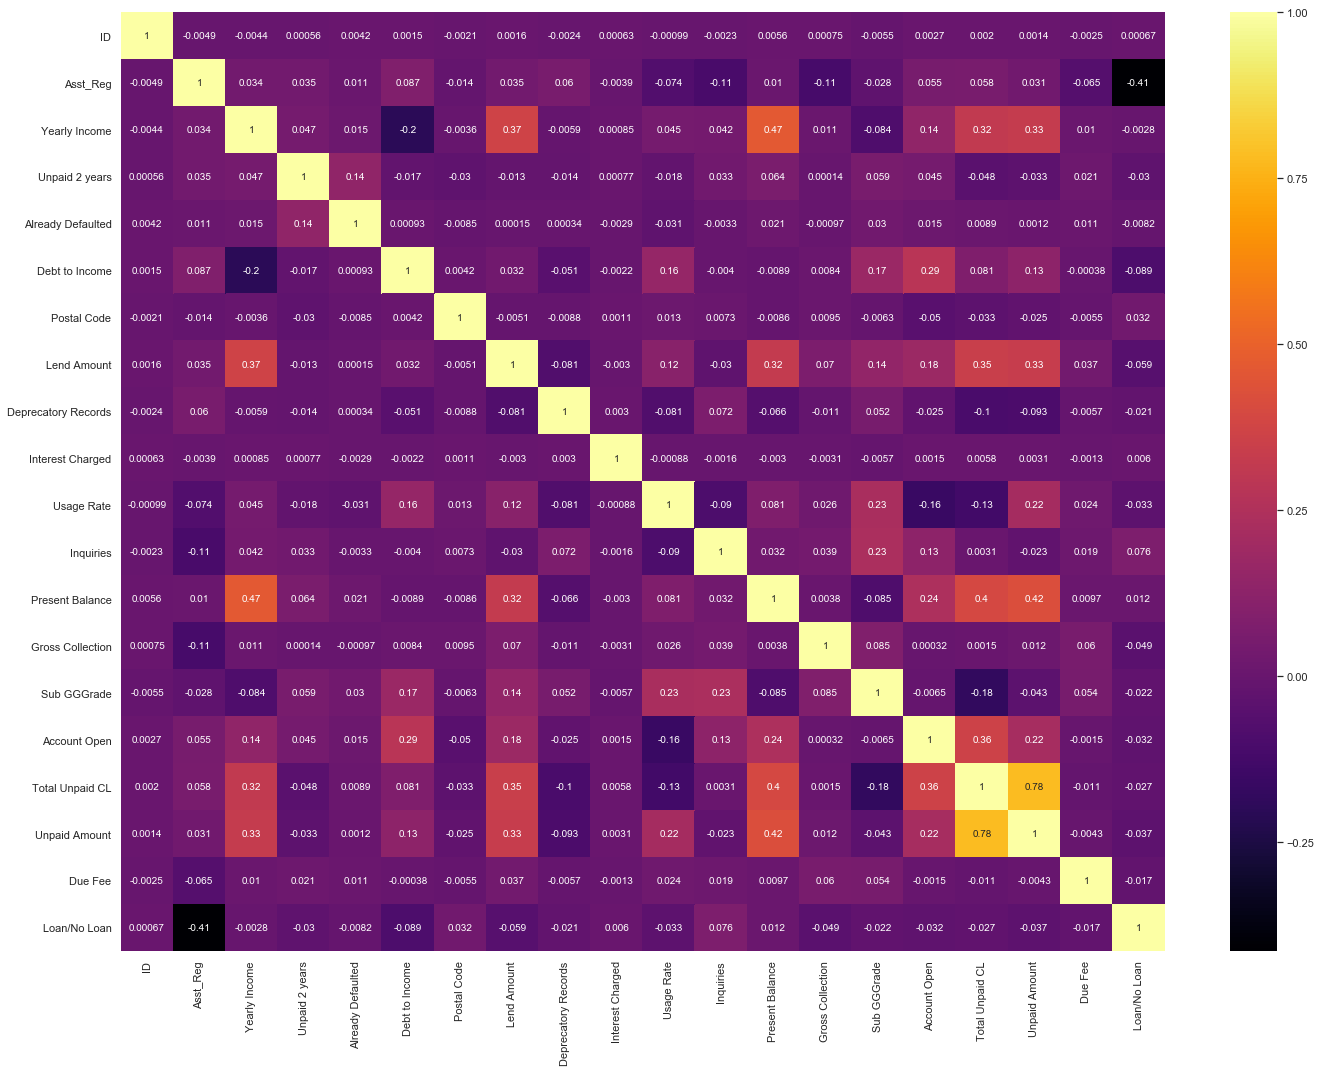

In [17]:
plt.figure(figsize=(20,15))
sns.heatmap(df_Data_Train.corr(),annot=True,cmap='inferno')
plt.tight_layout()
plt.show()

In [18]:
df_Data_Test = pd.read_csv("Data_Test.csv")
df_Data_Test.head()

,ID,Asst_Reg,GGGrade,Experience,Validation,Yearly Income,Home Status,Unpaid 2 years,Already Defaulted,Designation,Debt to Income,Postal Code,Lend Amount,Deprecatory Records,Interest Charged,Usage Rate,Inquiries,Present Balance,Gross Collection,Sub GGGrade,File Status,State,Account Open,Total Unpaid CL,Duration,Unpaid Amount,Reason,Claim Type,Due Fee
0,198980,1773284,II,2yrs,Source Verified,140800.00,OWN,0,0,processor,16.9176,90600.0,17955.00,0,8.88,78.432,1,59769.30,0.0,17,fully paid,California,23,33532.0,3 years,15755.94,major purchase,I,0.0
1,167688,5298273,II,>10yrs,Vfied,146080.00,MOR??AGE,0,0,Speech Language Pathologist,28.6944,32300.0,59850.00,0,10.10,76.368,1,532962.13,0.0,19,whole,Florida,17,149234.0,5 years,68237.55,debt consolidation,I,0.0
2,198768,189781,VI,>10yrs,Vfied,202222.24,MOR??AGE,0,0,Raytheon,51.1560,88000.0,59850.00,0,19.30,157.552,2,288816.48,0.0,37,whole,NM,15,70218.0,5 years,66272.76,debt consolidation,I,0.0
3,192564,1530906,II,>10yrs,Vfied,105600.00,MOR??AGE,1,0,Computer/Network Technician,27.0144,19900.0,19323.00,0,8.82,32.852,2,424664.30,0.0,19,fully paid,DE,18,79182.0,3 years,15595.20,credit card,I,0.0
4,151199,4410316,III,4yrs,Not Vfied,151360.00,MOR??AGE,0,0,NDE Tech,10.3824,34900.0,25350.75,1,13.52,108.532,1,251704.07,0.0,25,fully paid,Florida,7,13612.0,3 years,8850.96,debt consolidation,I,0.0


In [19]:
df_Data_Test.tail()

,ID,Asst_Reg,GGGrade,Experience,Validation,Yearly Income,Home Status,Unpaid 2 years,Already Defaulted,Designation,Debt to Income,Postal Code,Lend Amount,Deprecatory Records,Interest Charged,Usage Rate,Inquiries,Present Balance,Gross Collection,Sub GGGrade,File Status,State,Account Open,Total Unpaid CL,Duration,Unpaid Amount,Reason,Claim Type,Due Fee
37495,191405,5774816,IV,4yrs,Vfied,308000.0,MOR??AGE,1,0,Regional Manager,29.4336,91700.0,59850.00,0,19.15,52.116,4,848107.83,0.0,29,fully paid,California,19,132468.0,3 years,57683.43,debt consolidation,I,0.0
37496,164868,1423834,IV,8yrs,Source Verified,158400.0,MOR??AGE,0,0,Clinical Coordinator,31.6008,19500.0,28215.00,0,19.02,165.120,1,614710.30,0.0,28,fully paid,PA,14,51958.0,5 years,51395.76,credit card,I,0.0
37497,163156,1895531,V,>10yrs,Not Vfied,52800.0,OWN,0,0,administrative,46.9728,90800.0,4916.25,1,18.68,54.868,3,47287.72,0.0,33,fully paid,California,9,8466.0,3 years,2783.88,debt consolidation,I,0.0
37498,169610,2168910,VI,9yrs,Not Vfied,52800.0,OWN,5,0,ParaEducator,48.0480,37000.0,15390.00,1,10.47,137.772,1,107614.80,0.0,40,whole,TN,9,17264.0,3 years,NaN,home improvement,I,0.0
37499,175557,4140268,II,>10yrs,Source Verified,121440.0,MOR??AGE,0,0,School Teacher,27.2664,91900.0,24624.00,0,9.80,104.060,0,783477.16,0.0,19,fully paid,California,15,47310.0,3 years,29504.34,debt consolidation,I,0.0


In [20]:
df_Data_Test.shape

(37500, 29)

In [21]:
df_Data_Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37500 entries, 0 to 37499
Data columns (total 29 columns):
ID                     37500 non-null int64
Asst_Reg               37500 non-null int64
GGGrade                37500 non-null object
Experience             37500 non-null object
Validation             37500 non-null object
Yearly Income          35075 non-null float64
Home Status            37500 non-null object
Unpaid 2 years         37500 non-null int64
Already Defaulted      37500 non-null int64
Designation            36914 non-null object
Debt to Income         35989 non-null float64
Postal Code            36889 non-null float64
Lend Amount            37500 non-null float64
Deprecatory Records    37500 non-null int64
Interest Charged       37500 non-null float64
Usage Rate             37500 non-null float64
Inquiries              37500 non-null int64
Present Balance        37500 non-null float64
Gross Collection       37500 non-null float64
Sub GGGrade            37500 non-n

In [22]:
df_Data_Test.describe()

,ID,Asst_Reg,Yearly Income,Unpaid 2 years,Already Defaulted,Debt to Income,Postal Code,Lend Amount,Deprecatory Records,Interest Charged,Usage Rate,Inquiries,Present Balance,Gross Collection,Sub GGGrade,Account Open,Total Unpaid CL,Unpaid Amount,Due Fee
count,37500.000000,3.750000e+04,3.507500e+04,37500.000000,37500.000000,35989.00000,36889.000000,37500.000000,37500.000000,37500.000000,37500.000000,37500.000000,3.750000e+04,37500.000000,37500.000000,37500.000000,3.568600e+04,3.543100e+04,37500.000000
mean,184143.867973,3.804858e+06,1.340308e+05,0.336427,0.005307,30.91903,51233.945078,25828.004160,0.200080,16.511014,95.259109,0.676640,2.353528e+05,39.484071,22.031467,12.777787,5.344820e+04,2.928066e+04,0.309792
std,21683.224387,2.284115e+06,1.000845e+05,0.887640,0.077966,13.87167,31250.428604,14402.061788,0.563137,4.912595,40.493219,0.964515,2.543097e+05,364.114581,6.481257,5.360527,5.215483e+04,3.560849e+04,3.396315
min,146560.000000,3.752200e+04,8.800000e+03,0.000000,0.000000,0.00000,1000.000000,1710.000000,0.000000,8.000000,0.000000,0.000000,0.000000e+00,0.000000,11.000000,2.000000,3.320000e+02,0.000000e+00,0.000000
25%,165341.250000,1.495828e+06,8.419400e+04,0.000000,0.000000,20.47920,22900.000000,14919.750000,0.000000,12.250000,65.532000,0.000000,5.129572e+04,0.000000,17.000000,9.000000,2.324000e+04,1.141425e+04,0.000000
50%,184257.000000,4.134010e+06,1.144000e+05,0.000000,0.000000,30.18960,47800.000000,23811.750000,0.000000,16.515000,96.492000,0.000000,1.383795e+05,0.000000,21.000000,12.000000,3.950800e+04,2.068074e+04,0.000000
75%,202869.250000,5.934898e+06,1.584000e+05,0.000000,0.000000,40.72320,80200.000000,34200.000000,0.000000,20.770000,126.764000,1.000000,3.514983e+05,0.000000,26.000000,15.000000,6.640000e+04,3.618446e+04,0.000000
max,221557.000000,7.351969e+06,8.800000e+06,18.000000,3.000000,116.50800,99900.000000,59850.000000,21.000000,25.000000,254.560000,6.000000,4.909890e+06,13900.000000,45.000000,60.000000,1.475408e+06,1.535830e+06,131.490000


In [23]:
df_Data_Test.isnull().sum()

ID                        0
Asst_Reg                  0
GGGrade                   0
Experience                0
Validation                0
Yearly Income          2425
Home Status               0
Unpaid 2 years            0
Already Defaulted         0
Designation             586
Debt to Income         1511
Postal Code             611
Lend Amount               0
Deprecatory Records       0
Interest Charged          0
Usage Rate                0
Inquiries                 0
Present Balance           0
Gross Collection          0
Sub GGGrade               0
File Status               0
State                     0
Account Open              0
Total Unpaid CL        1814
Duration                  0
Unpaid Amount          2069
Reason                    0
Claim Type                0
Due Fee                   0
dtype: int64

In [24]:
df_Data_Test["Home Status"].replace(['REN?'],["RENT"],inplace=True )
df_Data_Test["Home Status"].replace(['MOR??AGE'],["MORTGAGE"],inplace=True )

In [25]:
for column in df_Data_Test.columns:
    if df_Data_Test[column].dtype == 'object':
        print(column.upper(),': ',df_Data_Test[column].nunique())
        print(df_Data_Test[column].value_counts().sort_values())
        print('\n')

GGGRADE :  7
VII      231
VI       963
V       3098
IV      5858
I       6129
II     10539
III    10682
Name: GGGrade, dtype: int64


EXPERIENCE :  11
9yrs       1635
6yrs       1857
7yrs       1969
8yrs       2144
4yrs       2239
5yrs       2412
1yrs       2443
<1yr       3102
3yrs       3128
2yrs       3412
>10yrs    13159
Name: Experience, dtype: int64


VALIDATION :  3
Vfied              11366
Not Vfied          11488
Source Verified    14646
Name: Validation, dtype: int64


HOME STATUS :  5
OTHER           2
NONE            2
OWN          3592
RENT        14992
MORTGAGE    18912
Name: Home Status, dtype: int64


DESIGNATION :  19510
Training Coordinator/Server/Bartender      1
SERVER                                     1
Sr IT Project Manager                      1
Insurance sales                            1
Nisource/Columbia Gas Transmission         1
Admin support manager                      1
fritolay                                   1
Personal Banker-Loans                  

In [26]:
for column in df_Data_Test.columns:
    if df_Data_Test[column].dtype != 'object':
        mean = df_Data_Test[column].mean()
        df_Data_Test[column] = df_Data_Test[column].fillna(mean)    
        
df_Data_Test.isnull().sum() 

ID                       0
Asst_Reg                 0
GGGrade                  0
Experience               0
Validation               0
Yearly Income            0
Home Status              0
Unpaid 2 years           0
Already Defaulted        0
Designation            586
Debt to Income           0
Postal Code              0
Lend Amount              0
Deprecatory Records      0
Interest Charged         0
Usage Rate               0
Inquiries                0
Present Balance          0
Gross Collection         0
Sub GGGrade              0
File Status              0
State                    0
Account Open             0
Total Unpaid CL          0
Duration                 0
Unpaid Amount            0
Reason                   0
Claim Type               0
Due Fee                  0
dtype: int64

In [27]:
mode = df_Data_Test['Designation'].mode()[0]
df_Data_Test['Designation'] = df_Data_Test['Designation'].fillna(mode)
df_Data_Test.isnull().sum() 

ID                     0
Asst_Reg               0
GGGrade                0
Experience             0
Validation             0
Yearly Income          0
Home Status            0
Unpaid 2 years         0
Already Defaulted      0
Designation            0
Debt to Income         0
Postal Code            0
Lend Amount            0
Deprecatory Records    0
Interest Charged       0
Usage Rate             0
Inquiries              0
Present Balance        0
Gross Collection       0
Sub GGGrade            0
File Status            0
State                  0
Account Open           0
Total Unpaid CL        0
Duration               0
Unpaid Amount          0
Reason                 0
Claim Type             0
Due Fee                0
dtype: int64

In [28]:
df_Data_Test['Postal Code'] = df_Data_Test['Postal Code'].astype("int64")
df_Data_Test.head()

,ID,Asst_Reg,GGGrade,Experience,Validation,Yearly Income,Home Status,Unpaid 2 years,Already Defaulted,Designation,Debt to Income,Postal Code,Lend Amount,Deprecatory Records,Interest Charged,Usage Rate,Inquiries,Present Balance,Gross Collection,Sub GGGrade,File Status,State,Account Open,Total Unpaid CL,Duration,Unpaid Amount,Reason,Claim Type,Due Fee
0,198980,1773284,II,2yrs,Source Verified,140800.00,OWN,0,0,processor,16.9176,90600,17955.00,0,8.88,78.432,1,59769.30,0.0,17,fully paid,California,23,33532.0,3 years,15755.94,major purchase,I,0.0
1,167688,5298273,II,>10yrs,Vfied,146080.00,MORTGAGE,0,0,Speech Language Pathologist,28.6944,32300,59850.00,0,10.10,76.368,1,532962.13,0.0,19,whole,Florida,17,149234.0,5 years,68237.55,debt consolidation,I,0.0
2,198768,189781,VI,>10yrs,Vfied,202222.24,MORTGAGE,0,0,Raytheon,51.1560,88000,59850.00,0,19.30,157.552,2,288816.48,0.0,37,whole,NM,15,70218.0,5 years,66272.76,debt consolidation,I,0.0
3,192564,1530906,II,>10yrs,Vfied,105600.00,MORTGAGE,1,0,Computer/Network Technician,27.0144,19900,19323.00,0,8.82,32.852,2,424664.30,0.0,19,fully paid,DE,18,79182.0,3 years,15595.20,credit card,I,0.0
4,151199,4410316,III,4yrs,Not Vfied,151360.00,MORTGAGE,0,0,NDE Tech,10.3824,34900,25350.75,1,13.52,108.532,1,251704.07,0.0,25,fully paid,Florida,7,13612.0,3 years,8850.96,debt consolidation,I,0.0


In [29]:
df_cat_train = df_Data_Train.select_dtypes(include = ['object'])
df_num_train = df_Data_Train.select_dtypes(include = ['float64','int64'])

from scipy.stats import zscore
df_num_train=df_num_train.apply(zscore)
df_num_train.head()

def treat_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
#     print(upper_range)
    return lower_range, upper_range

for feature in df_num_train.columns: 
    lr,ur=treat_outlier(df_num_train[feature])
    df_num_train[feature]=np.where(df_num_train[feature]>ur,ur,df_num_train[feature])
    df_num_train[feature]=np.where(df_num_train[feature]<lr,lr,df_num_train[feature])

In [30]:
df_cat_train = df_cat_train.drop(columns=['Designation','State'], axis=1)
df_cat_train = pd.get_dummies(df_cat_train, drop_first = True)
df_cat_train.shape

(87500, 37)

In [31]:
df_train = pd.concat([df_cat_train,df_num_train],axis=1)
df_train.head()

,GGGrade_II,GGGrade_III,GGGrade_IV,GGGrade_V,GGGrade_VI,GGGrade_VII,Experience_2yrs,Experience_3yrs,Experience_4yrs,Experience_5yrs,Experience_6yrs,Experience_7yrs,Experience_8yrs,Experience_9yrs,Experience_<1yr,Experience_>10yrs,Validation_Source Verified,Validation_Vfied,Home Status_NONE,Home Status_OTHER,Home Status_OWN,Home Status_RENT,File Status_whole,Duration_5 years,Reason_credit card,Reason_debt consolidation,Reason_home improvement,Reason_house,Reason_major purchase,Reason_medical,Reason_moving,Reason_other,Reason_renewable energy,Reason_small business,Reason_vacation,Reason_wedding,Claim Type_J,ID,Asst_Reg,Yearly Income,Unpaid 2 years,Already Defaulted,Debt to Income,Postal Code,Lend Amount,Deprecatory Records,Interest Charged,Usage Rate,Inquiries,Present Balance,Gross Collection,Sub GGGrade,Account Open,Total Unpaid CL,Unpaid Amount,Due Fee,Loan/No Loan
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,95074,421802,633600.00,0,0,12.5496,91300,42023.25,0,15.39,88.924,3,607161.90,0.0,19,17,58598.0,31216.05,0.0,0
1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,134131,3964312,85483.20,0,0,9.0048,27400,38133.00,0,9.94,102.856,0,269234.06,0.0,30,15,18924.0,11660.49,0.0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,92602,4247560,79200.00,0,0,24.9144,32800,17100.00,0,22.35,60.372,0,22476.53,0.0,25,7,15604.0,5637.87,0.0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,22591,197179,61600.00,0,0,16.5816,7000,5130.00,0,10.36,116.272,1,15242.09,0.0,22,9,22410.0,15607.17,0.0,1
4,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,125060,4646684,68053.92,0,0,40.0512,70800,19665.00,0,13.68,127.280,1,65433.94,0.0,32,10,36022.0,27472.86,0.0,0


In [32]:
df_cat_test = df_Data_Test.select_dtypes(include = ['object'])
df_num_test = df_Data_Test.select_dtypes(include = ['float64','int64'])

In [33]:
df_cat_test = df_cat_test.drop(columns=['Designation','State'], axis=1)
df_cat_test = pd.get_dummies(df_cat_test, drop_first = True)
df_cat_test.shape

(37500, 37)

In [34]:
df_test = pd.concat([df_cat_test,df_num_test],axis=1)
df_test.head()

,GGGrade_II,GGGrade_III,GGGrade_IV,GGGrade_V,GGGrade_VI,GGGrade_VII,Experience_2yrs,Experience_3yrs,Experience_4yrs,Experience_5yrs,Experience_6yrs,Experience_7yrs,Experience_8yrs,Experience_9yrs,Experience_<1yr,Experience_>10yrs,Validation_Source Verified,Validation_Vfied,Home Status_NONE,Home Status_OTHER,Home Status_OWN,Home Status_RENT,File Status_whole,Duration_5 years,Reason_credit card,Reason_debt consolidation,Reason_home improvement,Reason_house,Reason_major purchase,Reason_medical,Reason_moving,Reason_other,Reason_renewable energy,Reason_small business,Reason_vacation,Reason_wedding,Claim Type_J,ID,Asst_Reg,Yearly Income,Unpaid 2 years,Already Defaulted,Debt to Income,Postal Code,Lend Amount,Deprecatory Records,Interest Charged,Usage Rate,Inquiries,Present Balance,Gross Collection,Sub GGGrade,Account Open,Total Unpaid CL,Unpaid Amount,Due Fee
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,198980,1773284,140800.00,0,0,16.9176,90600,17955.00,0,8.88,78.432,1,59769.30,0.0,17,23,33532.0,15755.94,0.0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,167688,5298273,146080.00,0,0,28.6944,32300,59850.00,0,10.10,76.368,1,532962.13,0.0,19,17,149234.0,68237.55,0.0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,198768,189781,202222.24,0,0,51.1560,88000,59850.00,0,19.30,157.552,2,288816.48,0.0,37,15,70218.0,66272.76,0.0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,192564,1530906,105600.00,1,0,27.0144,19900,19323.00,0,8.82,32.852,2,424664.30,0.0,19,18,79182.0,15595.20,0.0
4,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,151199,4410316,151360.00,0,0,10.3824,34900,25350.75,1,13.52,108.532,1,251704.07,0.0,25,7,13612.0,8850.96,0.0


In [35]:
df_train.shape

(87500, 57)

In [36]:
df_test.shape

(37500, 56)

In [37]:
test_file_ids = df_test['ID']
df_test_new = df_test.drop(columns=['ID'], axis=1)

In [38]:
df_test_new.shape

(37500, 55)

In [39]:
df_train_new = df_train.drop(columns=['ID'], axis=1)
df_train_new.shape

(87500, 56)

In [40]:
x = df_train_new.drop('Loan/No Loan', axis=1)

y = df_train_new['Loan/No Loan']

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3 , random_state=42,stratify=y)
x_train.shape

(61250, 55)

### Logistic Regression

In [77]:
from sklearn.linear_model import LogisticRegression
LR_model1 = LogisticRegression(penalty='l2', solver='liblinear', tol=0.0000001,n_jobs=-1)
LR_model1.fit(x_train, y_train)
ytrain_predict = LR_model1.predict(x_train)
ytest_predict = LR_model1.predict(x_test)
Logistic_Regression_accuracy = LR_model1.score(x_test, y_test)
LR_model1

C:\Users\Hp\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs))


LogisticRegression(n_jobs=-1, solver='liblinear', tol=1e-07)

In [78]:
print(classification_report(y_train, ytrain_predict),'\n')

              precision    recall  f1-score   support

           0       0.85      0.96      0.90     49692
           1       0.64      0.29      0.40     11558

    accuracy                           0.84     61250
   macro avg       0.75      0.63      0.65     61250
weighted avg       0.81      0.84      0.81     61250
 



In [79]:
lr_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
dftra=pd.DataFrame(lr_metrics).transpose()
lr_test_recall=round(dftra.loc["1"][0],2)
print ('lr_test_recall ',lr_test_recall)

lr_test_recall  0.4


In [72]:
resultsDf = pd.DataFrame({'Recall':lr_test_recall},index=['Logistic Regression'])
resultsDf

,Recall
Logistic Regression,0.41


### Random forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
rfcl = RandomForestClassifier(random_state=42) 
rfcl = rfcl.fit(x_train, y_train)
ytrain_predict = rfcl.predict(x_train)
ytest_predict = rfcl.predict(x_test)
rfcl_accuracy = rfcl.score(x_test, y_test)
rfcl_accuracy

0.8370666666666666

In [48]:
ytrain_predict = rfcl.predict(x_train)
ytest_predict = rfcl.predict(x_test)

In [49]:
print(classification_report(y_train, ytrain_predict),'\n')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     49692
           1       1.00      1.00      1.00     11558

    accuracy                           1.00     61250
   macro avg       1.00      1.00      1.00     61250
weighted avg       1.00      1.00      1.00     61250
 



In [50]:
rf_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
dftra_rf=pd.DataFrame(rf_metrics).transpose()
rf_test_recall=round(dftra_rf.loc["1"][2],2)
print ('rf_test_recall ',rf_test_recall)

rf_test_recall  1.0


In [51]:
resultsDf1 = pd.DataFrame({'Recall':rf_test_recall},index=['Random forest'])
resultsDf = pd.concat([resultsDf1,resultsDf])
resultsDf

,Recall
Random forest,1.00
Logistic Regression,0.32


### Decision tree

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
dt_model = DecisionTreeClassifier(random_state=42)

In [54]:
dt_model = DecisionTreeClassifier(criterion = 'gini',max_depth= 110,max_features=50, min_samples_leaf= 110,min_samples_split= 150,random_state=15)

In [55]:
dt_model.fit(x_train, y_train)
ytrain_predict = dt_model.predict(x_train)
ytest_predict = dt_model.predict(x_test)
Decision_tree_accuracy = dt_model.score(x_test, y_test)
Decision_tree_accuracy

0.8314285714285714

In [56]:
print(classification_report(y_train, ytrain_predict),'\n')

              precision    recall  f1-score   support

           0       0.86      0.97      0.91     49692
           1       0.70      0.32      0.44     11558

    accuracy                           0.85     61250
   macro avg       0.78      0.64      0.67     61250
weighted avg       0.83      0.85      0.82     61250
 



In [57]:
dt_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
dftra_dt=pd.DataFrame(dt_metrics).transpose()
dt_test_recall=round(dftra_dt.loc["1"][0],2)
print ('dt_test_recall ',dt_test_recall)

dt_test_recall  0.32


In [58]:
resultsDf2 = pd.DataFrame({'Recall':dt_test_recall},index=['Decision tree'])
resultsDf = pd.concat([resultsDf2,resultsDf])
resultsDf

,Recall
Decision tree,0.32
Random forest,1.00
Logistic Regression,0.32


### Linear DA

In [59]:
### from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
model=clf.fit(x_train,y_train)
pred_class_train = model.predict(x_train)
pred_class_test = model.predict(x_test)
model.score(x_train,y_train)

0.8349061224489795

In [60]:
print(classification_report(y_train,pred_class_train))
lda_metrics=classification_report(y_train,pred_class_train,output_dict=True)
dftra_lda=pd.DataFrame(lda_metrics).transpose()
lda_test_f1=round(dftra_lda.loc["1"][0],2)
print (dftra_lda)
print ('lda_test_f1 ',lda_test_f1)

              precision    recall  f1-score   support

           0       0.86      0.96      0.90     49692
           1       0.62      0.32      0.42     11558

    accuracy                           0.83     61250
   macro avg       0.74      0.64      0.66     61250
weighted avg       0.81      0.83      0.81     61250

              f1-score  precision    recall       support
0             0.903758   0.857375  0.955446  49692.000000
1             0.419917   0.623085  0.316664  11558.000000
accuracy      0.834906   0.834906  0.834906      0.834906
macro avg     0.661837   0.740230  0.636055  61250.000000
weighted avg  0.812456   0.813164  0.834906  61250.000000
lda_test_f1  0.42


In [62]:
resultsDf3 = pd.DataFrame({'Recall':lda_test_f1},index=['LDA'])
resultsDf = pd.concat([resultsDf3,resultsDf])
resultsDf

,Recall
LDA,0.42
Decision tree,0.32
Random forest,1.00
Logistic Regression,0.32


### ANN

{'activation': ['logistic', 'relu'],
'hidden_layer_sizes': [(50, 100, 200)],
'max_iter': [2500, 3000, 4000],
'solver': ['lbfgs', 'sgd', 'adam'], 'tol': [0.01]})

In [129]:
from sklearn.neural_network import MLPClassifier
param_grid_ANN = { 'hidden_layer_sizes': [102], 'activation': [ 'relu'], 'max_iter': [12500], 'solver': ['adam'], 'tol': [0.01], }
ANN = MLPClassifier(random_state=42)

grid_search_ANN = GridSearchCV(estimator = ANN, param_grid = param_grid_ANN, cv = 5)
grid_search_ANN.fit(x_train, y_train)
grid_search_ANN.best_params_
best_grid_ANN = grid_search_ANN.best_estimator_
best_grid_ANN
# ANN.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=102, max_iter=12500, random_state=42, tol=0.1)

In [133]:
ytrain_predict_ann = best_grid_ANN.predict(x_train)
# ytrain_ann = ANN.predict(x_train)
ytest_predict_ann = best_grid_ANN.predict(x_test)
# ytest_ann = ANN.predict(x_test)

print(classification_report(y_train,ytrain_predict_ann),4)
print(classification_report(y_test,ytest_predict_ann),4)
# print(classification_report(y_train,ytrain_ann))

              precision    recall  f1-score   support

           0       0.91      0.48      0.63     49692
           1       0.26      0.79      0.39     11558

    accuracy                           0.54     61250
   macro avg       0.58      0.64      0.51     61250
weighted avg       0.79      0.54      0.59     61250
 4
              precision    recall  f1-score   support

           0       0.90      0.49      0.64     21296
           1       0.26      0.78      0.39      4954

    accuracy                           0.54     26250
   macro avg       0.58      0.63      0.51     26250
weighted avg       0.78      0.54      0.59     26250
 4


In [156]:
final_predictions = NBA.predict(df_test_new)
submission=pd.DataFrame([test_file_ids,final_predictions]).T
submission.rename(columns={"Unnamed 0": "Loan/No Loan"},inplace=True)
submission.to_csv('submission.csv',index = False)

param_grid_ANN = {
    'hidden_layer_sizes': [90],
    'activation': [ 'relu'],
    'max_iter': [10000], 
    'solver': ['adam'], 
    'tol': [0.01], 
}

 {
    'hidden_layer_sizes': [100],
    'activation': [ 'relu'],
    'max_iter': [12500], 
    'solver': ['adam'], 
    'tol': [0.1], 
}
#79%
{
    'hidden_layer_sizes': [102],
    'activation': [ 'relu'],
    'max_iter': [12500], 
    'solver': ['adam'], 
    'tol': [0.1], 
}

In [66]:
print(classification_report(y_train,ytrain_predict_ann))
ann_metrics=classification_report(y_train,ytrain_predict_ann,output_dict=True)
dftra_ann=pd.DataFrame(ann_metrics).transpose()
ann_test_recall=round(dftra_ann.loc["1"][0],2)
print ('ann_test_recall ',ann_test_recall)

              precision    recall  f1-score   support

           0       0.91      0.48      0.63     49692
           1       0.26      0.79      0.39     11558

    accuracy                           0.54     61250
   macro avg       0.58      0.64      0.51     61250
weighted avg       0.79      0.54      0.59     61250

ann_test_recall  0.39


In [67]:
from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier(n_neighbors=7 , weights = 'distance' )
NNH.fit(x_train, y_train)
train_predict_NNH = NNH.predict(x_train)
test_predict_NNH = NNH.predict(x_test)
NNH.score(x_train, y_train)


1.0

In [68]:
print(classification_report(y_train, train_predict_NNH))
print(classification_report(y_test, test_predict_NNH))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     49692
           1       1.00      1.00      1.00     11558

    accuracy                           1.00     61250
   macro avg       1.00      1.00      1.00     61250
weighted avg       1.00      1.00      1.00     61250

              precision    recall  f1-score   support

           0       0.85      0.94      0.89     21296
           1       0.51      0.29      0.37      4954

    accuracy                           0.81     26250
   macro avg       0.68      0.61      0.63     26250
weighted avg       0.79      0.81      0.79     26250



### Gradient Bossting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbr = GradientBoostingClassifier()
gbr.fit(x_train, y_train)
predictions = gbr.predict(x_train)
gbr.fit(x_train, y_train)
train_predict_gbr = gbr.predict(x_train)
test_predict_gbr = gbr.predict(x_test)
gbr.score(x_train, y_train)

In [ ]:
print(classification_report(y_train, predictions))
print(classification_report(y_test, test_predict_gbr))

### Navive bayes

In [155]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

# creatw the model
NBA = GaussianNB(var_smoothing=0.000000001)

NBA.fit(x_train, y_train)
NBA_train_predict = NBA.predict(x_train)
print(classification_report(y_train, NBA_train_predict))

              precision    recall  f1-score   support

           0       0.94      0.62      0.75     49692
           1       0.34      0.84      0.49     11558

    accuracy                           0.66     61250
   macro avg       0.64      0.73      0.62     61250
weighted avg       0.83      0.66      0.70     61250



### ADA boosting

In [153]:
from sklearn.ensemble import AdaBoostClassifier
params1 = {
    "learning_rate":[1.0,2.0,3.0],
    "algorithm":['SAMME','SAMME.R'],
    "n_estimators":[50]
}
ADB_model=AdaBoostClassifier(n_estimators=300,random_state=42)
grid_search1=GridSearchCV(estimator=ADB_model,
                        param_grid=params1,
                        n_jobs=-1,
                        verbose=0,
                        cv=10)
grid_search1.fit(x_train, y_train)
grid_search1.best_score_

0.8380408163265306

In [154]:
adaboosting_best = grid_search1.best_estimator_
adaboosting_best
ytrain_predict = adaboosting_best.predict(x_train)
ytest_predict = adaboosting_best.predict(x_test)
print(classification_report(y_train,ytrain_predict))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91     49692
           1       0.67      0.30      0.41     11558

    accuracy                           0.84     61250
   macro avg       0.76      0.63      0.66     61250
weighted avg       0.82      0.84      0.81     61250

